# ** IMPORT and Train GP Model**

In [1]:
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from IPython.display import display
from mp_learning import snake
import numpy as np

%matplotlib inline

FILEHOME = os.path.abspath(os.path.curdir)
datapath = FILEHOME + '/data/cpg_output_snake_2s_1.txt'

model = snake.Model(datapath, 'snake')
gp = snake.SGPRegression(model)

gp.train(gp.train_data[:2000,:], gp.train_labels[:2000,:])

gpdata = gp.test_data[:1000, :]

gplabels = gp.test_labels[:1000, :]
gppred = gp.test(gpdata)[0]

# gppred_diff = np.abs(gppred - gplabels)


/home/colin/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
 /home/colin/anaconda2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning:The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.


(15125, 10)
(15125, 16)


In [ ]:
import GPy
display(gp.model)
fig = gp.model.plot(which_data_ycols=[6])

### **Debugging: Check that mvmt_class assigned correctly**


In [5]:
# gptraindata = gp.train_data
# print gptraindata.shape

# gpdata[gpdata[:,-1]==8]
# for i,x in enumerate(gpdata[:,-1]==8):
#     if x == True:
#         print gp.embedded_start_states[-202+i:-201+i,:][:,1:]
#         print gp.embedded_end_states[-202+i:-201+i,:][:,1:]
# print gp.embedded_start_states[-202:,:][gpdata[:,-1]==8][:4,1:]
# print gp.embedded_end_states[-202:,:][gpdata[:,-1]==8][:4,1:]
# gpdata_class = gptraindata[:,-1]
# # gpdata_class.reshape(1813,1)
# print gp.embedded_start_states[:1813,:2].shape
# print gp.embedded_end_states[:1813,:2].shape
# print (gp.embedded_end_states[:1813,1:3]-gp.embedded_start_states[:1813,1:3]).shape
# print np.concatenate((gp.embedded_start_states[:1813,1:3],
#                 gp.embedded_end_states[:1813,1:3],
#                 gp.embedded_end_states[:1813,1:3]-gp.embedded_start_states[:1813:,1:3],
#                 gpdata_class.reshape(1813,1)),
#                 axis=1)[:5]

# **Distribution over 8 directional classes**

In [ ]:
print "Training Data Size: ", gp.train_data.shape
plt.figure(1)
plt.hist(model.train_data[:,-1])
plt.show()

print "Testing Data Size: ", gp.test_data.shape
plt.figure(3)
plt.hist(model.test_data[:,-1])
plt.show()

# **VIZ CPG Control Output: all 16 Dimensions, in summary**

DIRECTION :   7


NameError: name 'gppred' is not defined

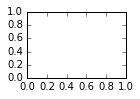

In [3]:
plt.figure(1)
direction = 7
print "DIRECTION :  ", direction

for idx in range(1,9):
    plt.subplot("33" + str(idx))
    column = idx - 1
    bins = np.linspace(np.min((np.min(gppred[:,column]),np.min(gplabels[:,column]))),
                  np.max((np.max(gppred[:,column]),np.max(gplabels[:,column]))), 40)
    n, bins_out, plot = plt.hist(gppred[gp.test_data[:,-1]==direction][:,column], 
                             bins, alpha=0.5, label="pred")
    n, bins_out, plot = plt.hist(gplabels[gp.test_data[:,-1]==direction][:,column], 
                             bins, alpha=0.5, label="lbl")
#     plt.legend(loc="upper right")
    plt.ylim([0, 20])
    plt.grid(True)
plt.show()

plt.figure(2)
for idx in range(1,9):
    plt.subplot("33" + str(idx))
    column = idx + 7
    bins = np.linspace(np.min((np.min(gppred[:,column]),np.min(gplabels[:,column]))),
                  np.max((np.max(gppred[:,column]),np.max(gplabels[:,column]))), 40)
    n, bins_out, plot = plt.hist(gppred[gp.test_data[:,-1]==direction][:,column], 
                             bins, alpha=0.5, label="pred")
    n, bins_out, plot = plt.hist(gplabels[gp.test_data[:,-1]==direction][:,column], 
                             bins, alpha=0.5, label="lbl")
#     plt.legend(loc="upper right")
    plt.ylim([0, 20])
    plt.grid(True)
plt.show()


# **VIZ CPG Output: Velocity terms in [-1,1], Single mvmt_class**

In [14]:
direction = 4
configuration = 10
labels = gp.train_labels
for i in range(1,9):
    print i, data[(data[:,-1]==i) & (data[:,-2]==configuration)].shape

1 (247, 2)
2 (362, 2)
3 (149, 2)
4 (833, 2)
5 (4, 2)
6 (34, 2)
7 (470, 2)
8 (523, 2)


Histogram of CPG max(left)/min(right) values, by initial configuration and movement direction
Initial Configuration:  10
Movement Direction :   4


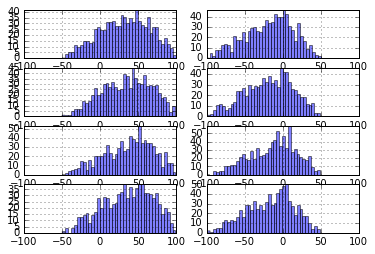

Initial Configuration:  10
Movement Direction :   8


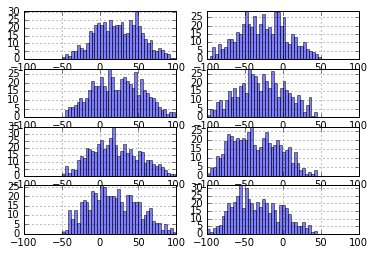

In [15]:
# data = np.concatenate((gp.start_states[:gp.start_states.shape[0]*0.9,:], 
#                        model.mvmt_class[:model.mvmt_class.shape[0]*0.9,:]), 
#                       axis=1)
labels = gp.train_labels
data = gp.train_data

# labels = labels[(data[:,9]<1) & (data[:,10]<1) & (data[:,11]<1) & (data[:,12]<1)
#     & (data[:,13]<1) & (data[:,14]<1) & (data[:,15]<1) & (data[:,16]<1)
#     & (data[:,17]<1) & (data[:,18]<1) & (data[:,19]<1) & (data[:,20]<1)
#     & (data[:,21]<1) & (data[:,22]<1) & (data[:,23]<1) & (data[:,24]<1)
#     & (data[:,25]<1) & (data[:,26]<1)
#     & (data[:,9]>-1) & (data[:,10]>-1) & (data[:,11]>-1) & (data[:,12]>-1)
#     & (data[:,13]>-1) & (data[:,14]>-1) & (data[:,15]>-1) & (data[:,16]>-1)
#     & (data[:,17]>-1) & (data[:,18]>-1) & (data[:,19]>-1) & (data[:,20]>-1)
#     & (data[:,21]>-1) & (data[:,22]>-1) & (data[:,23]>-1) & (data[:,24]>-1)
#     & (data[:,25]>-1) & (data[:,26]>-1)
#     & (data[:,3]>0) & (data[:,4]>0)
#     & (data[:,6]>0) & (data[:,7]>0)]

# data = data[(data[:,9]<1) & (data[:,10]<1) & (data[:,11]<1) & (data[:,12]<1)
#     & (data[:,13]<1) & (data[:,14]<1) & (data[:,15]<1) & (data[:,16]<1)
#     & (data[:,17]<1) & (data[:,18]<1) & (data[:,19]<1) & (data[:,20]<1)
#     & (data[:,21]<1) & (data[:,22]<1) & (data[:,23]<1) & (data[:,24]<1)
#     & (data[:,25]<1) & (data[:,26]<1)
#     & (data[:,9]>-1) & (data[:,10]>-1) & (data[:,11]>-1) & (data[:,12]>-1)
#     & (data[:,13]>-1) & (data[:,14]>-1) & (data[:,15]>-1) & (data[:,16]>-1)
#     & (data[:,17]>-1) & (data[:,18]>-1) & (data[:,19]>-1) & (data[:,20]>-1)
#     & (data[:,21]>-1) & (data[:,22]>-1) & (data[:,23]>-1) & (data[:,24]>-1)
#     & (data[:,25]>-1) & (data[:,26]>-1)
#     & (data[:,3]>0) & (data[:,4]>0)
#     & (data[:,6]>0) & (data[:,7]>0)]

# print "Velocity Terms in [-1,1]"
print "Histogram of CPG max(left)/min(right) values, by initial configuration and movement direction"

plt.figure(1)
direction = 4
configuration = 10
print "Initial Configuration: ", configuration
print "Movement Direction :  ", direction

for idx in range(1,9):
    plt.subplot("42" + str(idx))
    column = idx - 1
    bins = np.linspace(np.min(labels[:,column]),
                  np.max(labels[:,column]), 40)
    n, bins_out, plot = plt.hist(labels[:,column][(data[:,-1]==direction) & (data[:,0]==configuration)], 
                             bins, alpha=0.5, label="lbl")
#     plt.legend(loc="upper right")
    plt.ylim([0, np.max(n)])
    plt.xlim([-100,100])
    plt.grid(True)
plt.show()

plt.figure(2)
direction = 8
configuration = 10
print "Initial Configuration: ", configuration
print "Movement Direction :  ", direction

for idx in range(1,9):
    plt.subplot("42" + str(idx))
    column = idx - 1
    bins = np.linspace(np.min(labels[:,column]),
                  np.max(labels[:,column]), 40)
    n, bins_out, plot = plt.hist(labels[:,column][(data[:,-1]==direction) & (data[:,0]==configuration)], 
                             bins, alpha=0.5, label="lbl")
#     plt.legend(loc="upper right")
    plt.ylim([0, np.max(n)])
    plt.xlim([-100,100])
    plt.grid(True)
plt.show()

# plt.figure(2)
# for idx in range(1,9):
#     plt.subplot("33" + str(idx))
#     column = idx + 7
#     bins = np.linspace(np.min(labels[:,column]),
#                   np.max(labels[:,column]), 40)
#     n, bins_out, plot = plt.hist(labels[:,column][data[:,-1]==direction], 
#                              bins, alpha=0.5, label="lbl")
# #     plt.legend(loc="upper right")
#     plt.ylim([0, np.max(n)])
#     plt.grid(True)
plt.show()



CPG Max/Min Values for Direction  8  and Controller  0


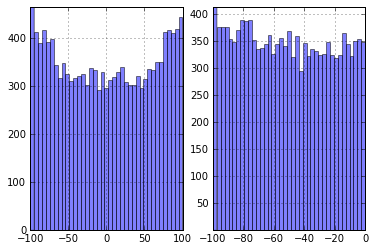

CPG Max/Min Values for Direction  8  and Controller  1


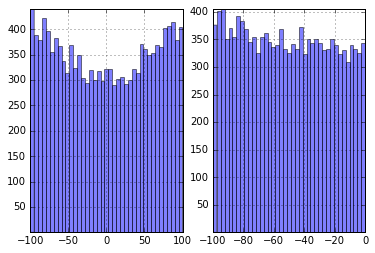

IndexError: index 8 is out of bounds for axis 1 with size 8

In [30]:
direction = 8
for idx in range(0,4):
    col = idx*4
    plt.figure(idx+3)
    maxes = labels[:,col]+labels[:,col+1]
    mins = -labels[:,col]+labels[:,col+1]
    plt.subplot("121")
    bins = np.linspace(np.min(maxes),
                  np.max(maxes), 40)
    n, bins_out, plot = plt.hist(maxes, bins, alpha=0.5)
    plt.ylim([1, np.max(n)])
    plt.grid(True)
    
    plt.subplot("122")
    bins = np.linspace(np.min(mins),
                  np.max(mins), 40)
    n, bins_out, plot = plt.hist(mins, bins, alpha=0.5)
    plt.ylim([1, np.max(n)])
    plt.grid(True)
    
    print "CPG Max/Min Values for Direction ", direction, " and Controller ", idx
    plt.show()


# **VIZ State Variables: Distibution of 18 Velocity Terms**

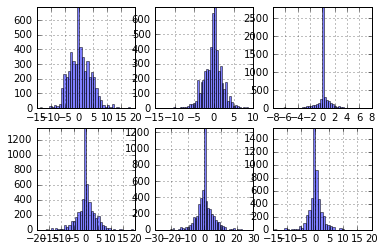

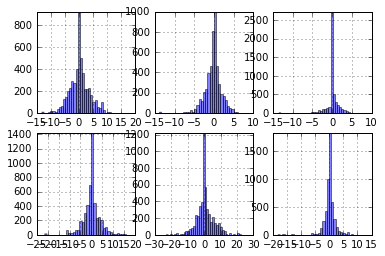

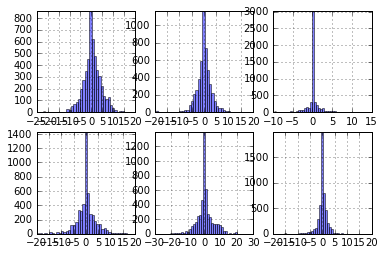

In [8]:
plt.figure(1)
# direction = 7
# print "DIRECTION :  ", direction

for idx in range(1,7):
    plt.subplot("23" + str(idx))
    column = idx + 8
    bins = np.linspace(np.min(gp.start_states[:,column]),
                  np.max(gp.start_states[:,column]), 40)
    n, bins_out, plot = plt.hist(gp.start_states[:,column], 
                             bins, alpha=0.5, label="data")
#     plt.legend(loc="upper right")
    plt.ylim([0, np.max(n)])
    plt.grid(True)
plt.show()

plt.figure(2)
for idx in range(1,7):
    plt.subplot("23" + str(idx))
    column = idx + 14
    bins = np.linspace(np.min(gp.start_states[:,column]),
                  np.max(gp.start_states[:,column]), 40)
    n, bins_out, plot = plt.hist(gp.start_states[:,column], 
                             bins, alpha=0.5, label="data")
#     plt.legend(loc="upper right")
    plt.ylim([0, np.max(n)])
    plt.grid(True)
plt.show()

plt.figure(3)
for idx in range(1,7):
    plt.subplot("23" + str(idx))
    column = idx + 20
    bins = np.linspace(np.min(gp.start_states[:,column]),
                  np.max(gp.start_states[:,column]), 40)
    n, bins_out, plot = plt.hist(gp.start_states[:,column], 
                             bins, alpha=0.5, label="data")
#     plt.legend(loc="upper right")
    plt.ylim([0, np.max(n)])
    plt.grid(True)
plt.show()

# **DATA Counting Num of Data Pts Within [-1,1] for All Velocity Variables**

In [22]:
x = gp.start_states
print "0: ", x.shape
for i in range(9,27):
    x = x[x[:,i]<1]
    x = x[x[:,i]>-1]
    print i-8, ": ", x.shape


0:  (12048, 27)
1 :  (3982, 27)
2 :  (2952, 27)
3 :  (2903, 27)
4 :  (2603, 27)
5 :  (2405, 27)
6 :  (2357, 27)
7 :  (2228, 27)
8 :  (2169, 27)
9 :  (2164, 27)
10 :  (2102, 27)
11 :  (2044, 27)
12 :  (2037, 27)
13 :  (1870, 27)
14 :  (1772, 27)
15 :  (1772, 27)
16 :  (1763, 27)
17 :  (1755, 27)
18 :  (1755, 27)


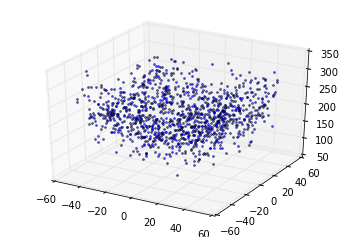

In [6]:
gppred_diff = np.sum(np.abs(gppred - gp.test_labels[:5000,:]), axis=1)

fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot(gplabels[:5000,0],gplabels[:5000,1],
            gppred_diff, 'o', ms=2, alpha=0.7)
# plt.colorbar(c)
plt.show()

1.50340582892


 /home/colin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning:boolean index did not match indexed array along dimension 0; dimension is 981 but corresponding boolean dimension is 892
 /home/colin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning:boolean index did not match indexed array along dimension 0; dimension is 981 but corresponding boolean dimension is 892


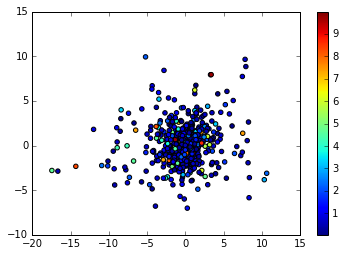

In [82]:
gplabels = gp.test_labels[:5000, :]
gppred_diff = np.sum(np.abs(gppred - gp.test_labels[:5000,:]), axis=1)

n = 10
magnit = np.sum(np.abs(gplabels), axis=1)
prop_diff = np.divide((magnit+gppred_diff), magnit) - 1
prop_diff = prop_diff[prop_diff < n]
magnit = magnit[prop_diff < n]
gplabels = gplabels[prop_diff < n, :]
print np.mean(prop_diff)
gp.plot2d(gplabels[:,0],gplabels[:,1],
            c=prop_diff)

In [99]:
from GPy.plotting.matplot_dep.base_plots import x_frame1D
samples = []
Xgrid, xmin, xmax = x_frame1D(gp.test_data)

gp.model.posterior_samples(Xgrid, samples)

AssertionError: x_frame1D is defined for one-dimensional inputs

In [3]:
gp.model.infer_newX(gp.test_labels[0:1, :])

(inferenceX.latent_mean:
 Param([[  3.86370535e-01,   2.54812031e-01,  -9.98214620e-01,
           4.76949596e-01,   4.63463877e-01,   1.37433465e-01,
           4.95273816e-01,   4.13618774e-01,   2.67958963e-01,
           1.78953670e-01,  -2.05662271e-01,   1.55085987e-01,
          -1.09567151e-01,  -2.81787040e-02,   9.61212252e-02,
           1.40423287e-01,  -6.73112068e-02,   2.25339709e-02,
          -1.46187462e-02,   9.84984974e-02,   1.62589273e-01,
           3.44151663e-02,   6.71120388e-02,  -1.12807269e-03,
          -1.60167627e-01,   1.02165766e-01,   3.00198921e-01,
           5.87589638e-04,  -1.72080978e-01,   1.42632547e-01,
           6.79508174e-02,  -4.91402800e-02,  -1.62598074e-01,
          -4.23700802e-02,   3.14328311e-02,   5.06328435e-02,
           8.30153395e-02,   4.75939861e-02,   6.70185456e-02,
           1.08584839e-02,   1.24555135e-01,   4.68101741e-03,
           1.20933448e+00]]),
 <GPy.inference.latent_function_inference.inferenceX.InferenceX

In [4]:
gp.test_data[0:1, :]

array([[  6.31731629e-01,   4.45895910e-01,  -9.99666572e-01,
          2.41668582e-01,   8.45234752e-01,   1.56367421e-01,
         -6.00130439e-01,   3.88257146e-01,   2.91258574e-01,
          1.51503444e-01,  -1.40740514e-01,   1.51015162e-01,
         -1.26709223e-01,  -5.88726997e-02,   1.08395576e-01,
          1.10759139e-01,  -6.35973811e-02,   3.25620174e-02,
         -6.30564690e-02,   7.92075396e-02,   1.48738384e-01,
          1.51834488e-02,   8.18853378e-02,  -2.70789862e-03,
         -1.88490212e-01,   6.81267977e-02,   2.84773469e-01,
          1.70856118e-01,  -9.67681646e-01,  -5.83537817e-01,
          9.83831882e-01,   3.59554529e-01,   3.84861469e-01,
         -9.54106092e-01,  -1.23102069e-01,   4.78265047e-01,
          7.72388220e-01,  -2.19364762e-01,   2.78047204e-01,
         -2.39084184e-01,  -1.56942546e-01,  -6.41968191e-01,
          2.94224477e+00]], dtype=float32)

In [14]:
gp.model.posterior_samples(gp.train_data[0:10,:], size=1, full_cov=False)

ValueError: mean and cov must have same length

In [19]:
gp.model.posterior